In [0]:
!pip install keras

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import os
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D

import matplotlib.pyplot as plt



Using TensorFlow backend.


In [0]:
####  ROAD QUALITY DATASETS ##################

X_train=np.load('datasets/RQ/x_train_RQ.npy')
X_test=np.load('datasets/RQ/x_test_RQ.npy')
Y_train=np.load('datasets/RQ/y_train_RQ.npy')
Y_test=np.load('datasets/RQ/y_test_RQ.npy')


Dataset shape: (221, 128, 128, 3)
221 sample, 128 x 128 x 3  size color image.

Examples:


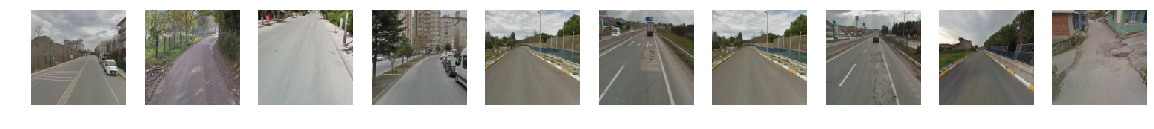

In [0]:
img_size = X_train.shape[1] # 64
channel_size = X_train.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2], 'x', channel_size, ' size color image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[np.random.randint(0, X_train.shape[0], 1)].reshape(img_size, img_size, channel_size))
    plt.axis('off')

Dataset shape: (56, 128, 128, 3)
56 sample, 128 x 128 x 3  size color image.

Examples:


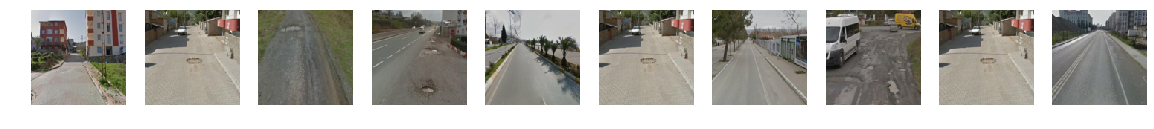

In [0]:
img_size = X_test.shape[1] # 64
channel_size = X_test.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2], 'x', channel_size, ' size color image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_test[np.random.randint(0, X_test.shape[0], 1)].reshape(img_size, img_size, channel_size))
    plt.axis('off')

In [0]:
from Model_class2 import our_1
model = our_1()

In [0]:
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), 
              metrics=['accuracy'])
datagen = ImageDataGenerator(width_shift_range=0,vertical_flip=False)

train_generator = datagen.flow(X_train, Y_train, batch_size=64)

foldername="Rq_our"
filename="/epoch-{epoch:02d}-val-acc-{val_acc:.4f}.hdf5"

checkpoints = []

if not os.path.exists(foldername):
    os.makedirs(foldername)

checkpoints.append(ModelCheckpoint(foldername+filename, 
                                   monitor='val_acc', 
                                   verbose=1, 
                                   save_best_only=True, 
                                   save_weights_only=True, 
                                   mode='auto', 
                                   period=1))

checkpoints.append(TensorBoard(log_dir=foldername+'/TensorBoardLogs', 
                               histogram_freq=0, 
                               write_graph=True, 
                               write_images=False, 
                               embeddings_freq=0, 
                               embeddings_layer_names=None, 
                               embeddings_metadata=None))




In [0]:
# TRAINING THE MODEL
model.fit_generator(train_generator, 
                    steps_per_epoch=6, 
                    epochs=100, 
                    validation_data=(X_test, Y_test),
                    validation_steps=6,
                    callbacks=checkpoints)


Epoch 1/100
6/6 [==============================] - 1s 144ms/step - loss: 0.7017 - acc: 0.5134 - val_loss: 0.6990 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to Rq_our_2/epoch-01-val-acc-0.5000.hdf5
Epoch 2/100
6/6 [==============================] - 1s 98ms/step - loss: 0.6901 - acc: 0.5001 - val_loss: 0.6753 - val_acc: 0.5000

Epoch 00002: val_acc improved from 0.50000 to 0.50000, saving model to Rq_our_2/epoch-02-val-acc-0.5000.hdf5
Epoch 3/100
6/6 [==============================] - 1s 93ms/step - loss: 0.6338 - acc: 0.6402 - val_loss: 0.5698 - val_acc: 0.7500

Epoch 00003: val_acc improved from 0.50000 to 0.75000, saving model to Rq_our_2/epoch-03-val-acc-0.7500.hdf5
Epoch 4/100
6/6 [==============================] - 1s 86ms/step - loss: 0.7196 - acc: 0.6210 - val_loss: 0.6698 - val_acc: 0.5536

Epoch 00004: val_acc did not improve
Epoch 5/100
6/6 [==============================] - 1s 88ms/step - loss: 0.5762 - acc: 0.6963 - val_loss: 0.5842 - 


Epoch 00048: val_acc did not improve
Epoch 49/100
6/6 [==============================] - 1s 87ms/step - loss: 2.2655e-05 - acc: 1.0000 - val_loss: 1.3010 - val_acc: 0.8750

Epoch 00049: val_acc did not improve
Epoch 50/100
6/6 [==============================] - 1s 92ms/step - loss: 2.4445e-05 - acc: 1.0000 - val_loss: 1.3015 - val_acc: 0.8750

Epoch 00050: val_acc did not improve
Epoch 51/100
6/6 [==============================] - 1s 88ms/step - loss: 2.1249e-05 - acc: 1.0000 - val_loss: 1.3020 - val_acc: 0.8750

Epoch 00051: val_acc did not improve
Epoch 52/100
6/6 [==============================] - 1s 92ms/step - loss: 2.1273e-05 - acc: 1.0000 - val_loss: 1.3024 - val_acc: 0.8750

Epoch 00052: val_acc did not improve
Epoch 53/100
6/6 [==============================] - 1s 94ms/step - loss: 2.0888e-05 - acc: 1.0000 - val_loss: 1.3029 - val_acc: 0.8750

Epoch 00053: val_acc did not improve
Epoch 54/100
6/6 [==============================] - 1s 90ms/step - loss: 1.8315e-05 - acc: 1.0000

6/6 [==============================] - 1s 93ms/step - loss: 6.9844e-06 - acc: 1.0000 - val_loss: 1.3098 - val_acc: 0.8750

Epoch 00097: val_acc did not improve
Epoch 98/100
6/6 [==============================] - 1s 86ms/step - loss: 9.0677e-06 - acc: 1.0000 - val_loss: 1.3101 - val_acc: 0.8750

Epoch 00098: val_acc did not improve
Epoch 99/100
6/6 [==============================] - 1s 92ms/step - loss: 7.4881e-06 - acc: 1.0000 - val_loss: 1.3103 - val_acc: 0.8750

Epoch 00099: val_acc did not improve
Epoch 100/100
6/6 [==============================] - 1s 88ms/step - loss: 7.2363e-06 - acc: 1.0000 - val_loss: 1.3104 - val_acc: 0.8750

Epoch 00100: val_acc did not improve


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
####  ROAD QUALITY RESULT ##################

model.load_weights("Rq_our_2/epoch-17-val-acc-0.8750.hdf5")
x_test = np.load('datasets/RQ/x_test_RQ.npy')
y_test = np.load('datasets/RQ/y_test_RQ.npy')

In [0]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

In [0]:
testPredict = model.predict(x_test)

In [0]:
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[[25  3]
 [ 4 24]]
